## Projeto - Fuzzy

#### Nome: Matheus Henrique Martins         TURMA: L1            MATRÍCULA: 1445

In [ ]:
!pip install scikit-fuzzy

In [56]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

#### Criando antescedente (entrada/input)

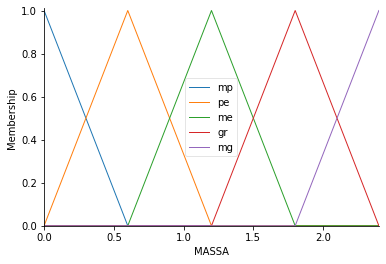

In [57]:
#Definindo universo de discurso e nome da variável
universe_mass = np.arange(0, 2.41, 0.01)
mass = control.Antecedent(universe = universe_mass, label = "MASSA")

#Criando função de PERTINÊNCIA (triangular -> trimf, trapezoidal -> trapmf)
mass.automf(5, names=["mp", "pe" , "me" , "gr" , "mg"])
mass.view()

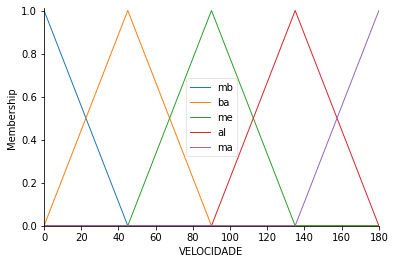

In [58]:
#Definindo universo de discurso e nome da variável
universe_speed = np.arange(0, 181)
speed = control.Antecedent(universe = universe_speed, label = "VELOCIDADE")

#Criando função de PERTINÊNCIA (triangular -> trimf, trapezoidal -> trapmf)
speed.automf(5, names=["mb", "ba" , "me" , "al" , "ma"])
speed.view()

#### Criando consequent (saída/output)

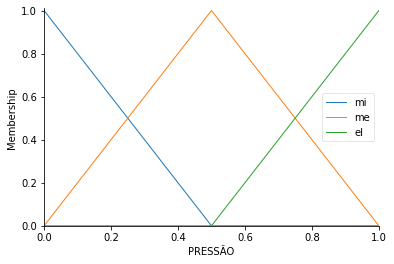

In [60]:
#Definindo universo de discurso e nome da variável
universe_pressure = np.arange(0, 1.001, 0.001)
pressure = control.Consequent(universe = universe_pressure, label = "PRESSÃO") #a consequência

#Criando função de PERTINÊNCIA (triangular -> trimf, trapezoidal -> trapmf)
pressure.automf(3, names=["mi" , "me" , "el"])
pressure.view()

#pressure["mi"] = fuzzy.trimf(pressure.universe, [0, 0, 0.5])
#pressure["me"] = fuzzy.trimf(pressure.universe, [0, 0.5, 1])
#pressure["el"] = fuzzy.trimf(pressure.universe, [0.5, 1, 1])

#### Criando regras

In [62]:
#REGRA -> expressão X, resultado Y

rule1 = control.Rule((speed["mb"] & mass["mp"]) |
                      (speed["mb"] & mass["pe"]) |
                      (speed["mb"] & mass["me"]) |
                      (speed["ba"] & mass["mp"]) |
                      (speed["ba"] & mass["pe"]) |
                      (speed["ba"] & mass["me"]) |
                      (speed["me"] & mass["mp"]) |
                      (speed["me"] & mass["pe"]), pressure["mi"])

rule2 = control.Rule((speed["mb"] & mass["gr"]) |
                      (speed["mb"] & mass["mg"]) |
                      (speed["ba"] & mass["gr"]) |
                      (speed["ba"] & mass["mg"]) |
                      (speed["me"] & mass["me"]) |
                      (speed["al"] & mass["mp"]) |
                      (speed["al"] & mass["pe"]) |
                      (speed["al"] & mass["me"]) |
                      (speed["ma"] & mass["mp"]) |
                      (speed["ma"] & mass["pe"]) |
                      (speed["ma"] & mass["me"]), pressure["me"])

rule3 = control.Rule((speed["me"] & mass["gr"]) |
                      (speed["me"] & mass["mg"]) |
                      (speed["al"] & mass["gr"]) |
                      (speed["al"] & mass["mg"]) |
                      (speed["ma"] & mass["gr"]) |
                      (speed["ma"] & mass["mg"]), pressure["el"])

#### CRIANDO SISTEMA

In [65]:
#Adicionando regras ao controle
pressure_control = control.ControlSystem([rule1, rule2, rule3])

#Criando sistema com o controle de pressão
system = control.ControlSystemSimulation(pressure_control)

Resultado 'desfuzzificado': 0.5595238095238096


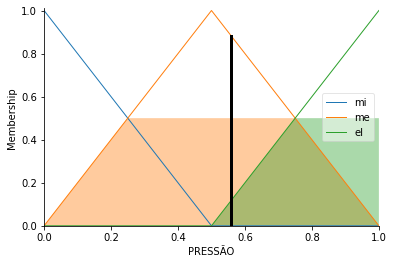

In [66]:
system.input["VELOCIDADE"] = 155
system.input["MASSA"] = 1.5

#EXECUTANDO O SISTEMA
system.compute()

print(f"Resultado 'desfuzzificado': {system.output['PRESSÃO']}")

pressure.view(sim=system)